# In this notebook we visualize effects of inserting promoters

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns
# sns.set_theme()
import akita_utils.format_io

# Importing scores from simulations

In [2]:
h5_dirs = "/home1/kamulege/akita_utils/bin/insert_promoter_experiment/data/promoter_scores_all/*/*.h5" # 
dfs = []
scd_stats = ["SCD"]

for h5_file in glob.glob(h5_dirs):
    dfs.append(akita_utils.format_io.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None))    
dfs = pd.concat(dfs)

for stat in scd_stats:
    dfs[f"mean_{stat}_score"] = (dfs[f"{stat}_h1_m1_t0"]+dfs[f"{stat}_h1_m1_t1"]+dfs[f"{stat}_h1_m1_t2"]+dfs[f"{stat}_h1_m1_t3"]+dfs[f"{stat}_h1_m1_t4"]+dfs[f"{stat}_h1_m1_t5"])/6

dfs

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_seqs,ctcf_flank_bp,ctcf_genomic_score,ctcf_locus_specification,...,gene_strand,gene_symbol,insert_flank_bp,insert_loci,insert_strand,locus_orientation,out_folder,spacer_bp,swap_flanks,mean_SCD_score
0,30.687500,16.390625,48.53125,51.84375,41.87500,41.53125,2,0,0.122314,"chr2,166083960,166083979",...,-,Prdm14,0$0,"chr2,166083960,166083979$chr1,13126164,13127164",-$-,>>,data,0,all_for_strong,38.46875
1,30.687500,16.390625,48.53125,51.84375,41.87500,41.53125,2,0,0.122314,"chr2,166083960,166083979",...,-,Prdm14,0$0,"chr2,166083960,166083979$chr1,13126164,13127164",-$-,>>,data,0,all_for_weak,38.46875
2,30.687500,16.390625,48.53125,51.84375,41.87500,41.53125,2,0,0.122314,"chr2,166083960,166083979",...,-,Prdm14,0$0,"chr2,166083960,166083979$chr1,13126164,13127164",-$-,>>,data,0,no,38.46875
3,30.687500,16.421875,48.71875,52.03125,42.09375,41.68750,2,0,0.122314,"chr2,166083960,166083979",...,-,Prdm14,0$0,"chr2,166083960,166083979$chr1,13126164,13127164",-$-,<<,data,0,all_for_strong,38.62500
4,30.687500,16.421875,48.71875,52.03125,42.09375,41.68750,2,0,0.122314,"chr2,166083960,166083979",...,-,Prdm14,0$0,"chr2,166083960,166083979$chr1,13126164,13127164",-$-,<<,data,0,all_for_weak,38.62500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,30.515625,15.187500,49.81250,53.62500,42.68750,42.37500,2,60,0.122314,"chr2,166083960,166083979",...,-,D630023F18Rik,60$100,"chr2,166083960,166083979$chr1,65122215,65123215",-$-,<>,data,60,all_for_weak,39.03125
7052,30.546875,15.296875,49.75000,53.53125,42.62500,42.31250,2,60,0.122314,"chr2,166083960,166083979",...,-,D630023F18Rik,60$100,"chr2,166083960,166083979$chr1,65122215,65123215",-$-,<>,data,60,no,39.00000
7053,30.578125,15.523438,49.71875,53.53125,42.65625,42.34375,2,60,0.122314,"chr2,166083960,166083979",...,-,D630023F18Rik,60$100,"chr2,166083960,166083979$chr1,65122215,65123215",-$-,><,data,60,all_for_strong,39.06250
7054,30.593750,15.484375,49.68750,53.46875,42.62500,42.31250,2,60,0.122314,"chr2,166083960,166083979",...,-,D630023F18Rik,60$100,"chr2,166083960,166083979$chr1,65122215,65123215",-$-,><,data,60,all_for_weak,39.03125


# General scores distribution

Text(0.5, 1.0, 'General distributions of SCD scores *n=11760*')

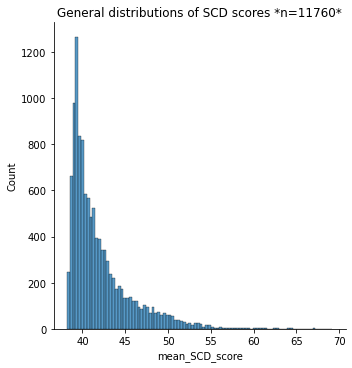

In [3]:
dfs.reset_index(drop=True, inplace=True)
dfs = dfs.loc[dfs["ctcf_genomic_score"]>=15] # filtering out weak ctcf (need a way to find better weaker ctcf, these aint working)
dfs = dfs.loc[dfs["swap_flanks"]== "no"] #"all_for_weak"]#] "weak_for_strong"
sns.displot(dfs, x="mean_SCD_score")
plt.title(f"General distributions of SCD scores *n={dfs.shape[0]}*")

# Effect of different background seqs 

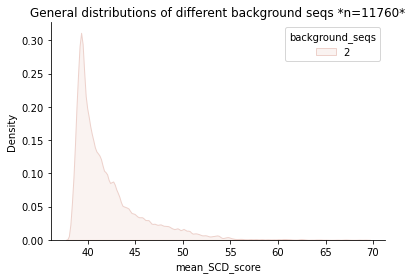

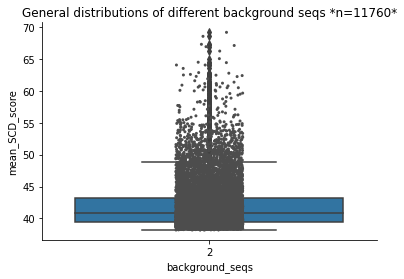

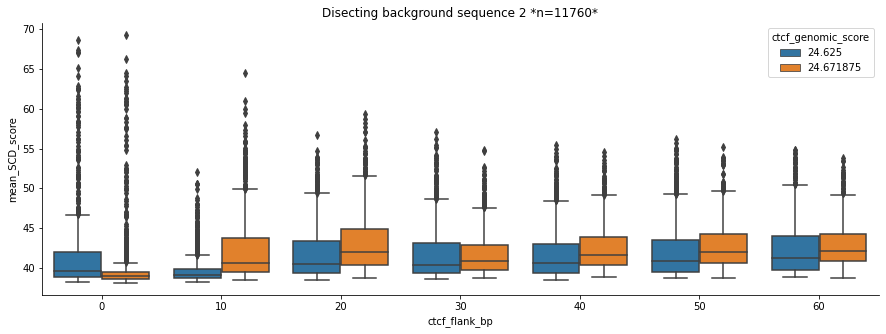

In [4]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="background_seqs", bw_adjust=.3, fill=True)
plt.title(f"General distributions of different background seqs *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()

sns.boxplot(data=dfs, x='background_seqs', y="mean_SCD_score")
sns.stripplot(x="background_seqs", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different background seqs *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()

for score in [2]:
    for stat in scd_stats:
        df_dummy_parameter = dfs.loc[dfs["background_seqs"]==score]
        plt.figure(figsize=(15,5))
        ax = sns.boxplot(data=df_dummy_parameter, x='ctcf_flank_bp', y=f"mean_{stat}_score", hue="ctcf_genomic_score")
        # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
        plt.title(f"Disecting background sequence {score} *n={df_dummy_parameter.shape[0]}*")
        sns.despine(top = True, right = True)
        # plt.ylim([35, 90])
        plt.show()
        plt.close()

# Effect of locus orientation

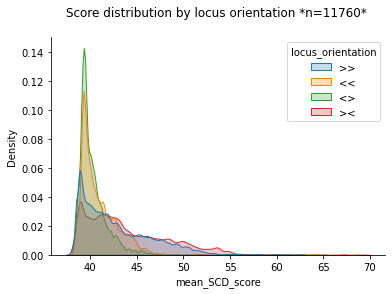

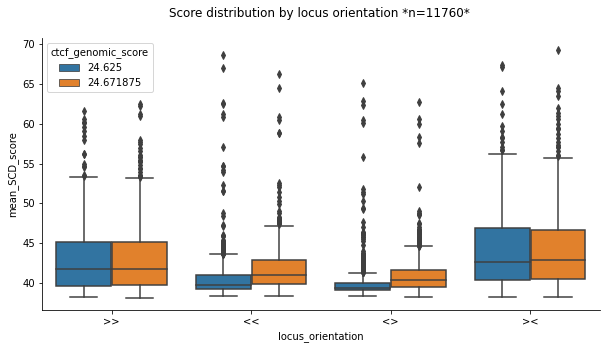

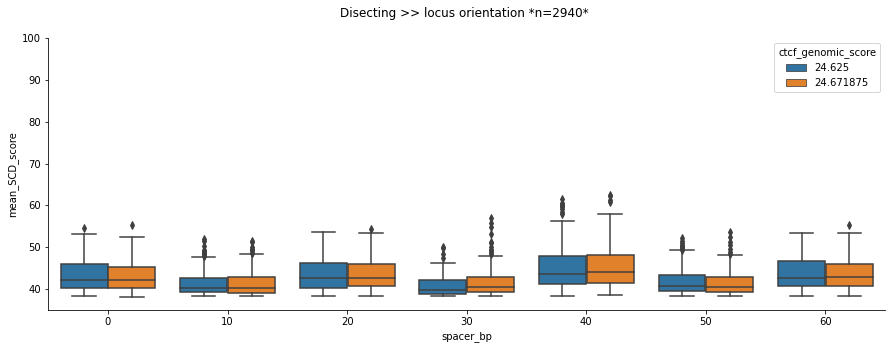

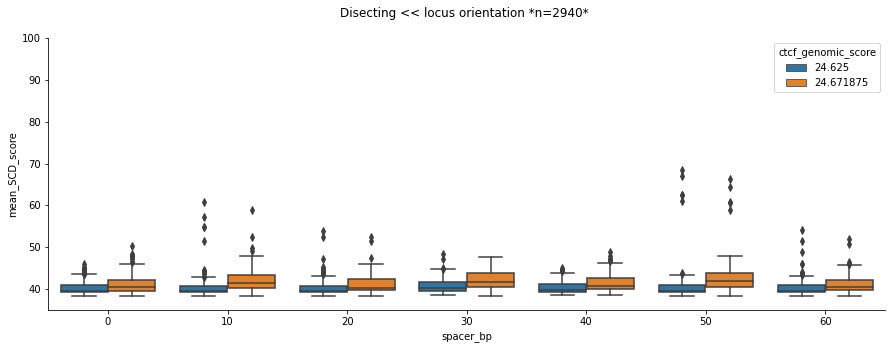

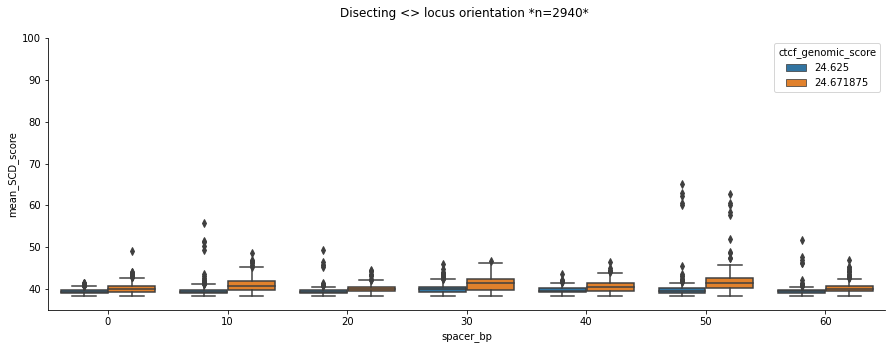

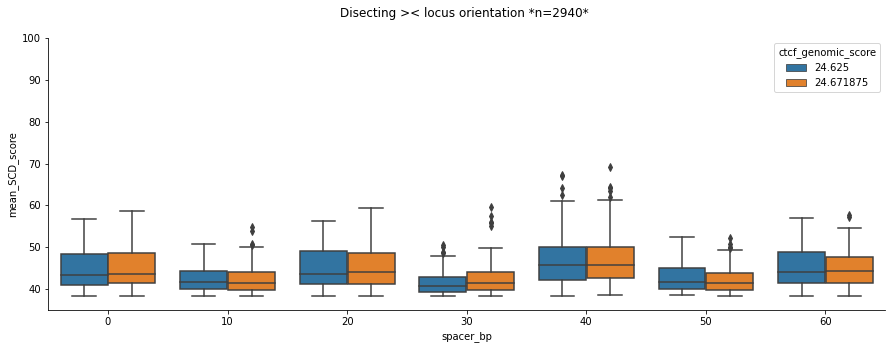

In [5]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="locus_orientation", bw_adjust=.3, fill=True)
plt.title(f"Score distribution by locus orientation *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

plt.figure(figsize=(10,5))
ax = sns.boxplot(data=dfs, x='locus_orientation', y="mean_SCD_score", hue="ctcf_genomic_score")
# sns.stripplot(x="locus_orientation", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"Score distribution by locus orientation *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for score in [">>","<<","<>","><"]: #
    df_dummy_parameter = dfs.loc[dfs["locus_orientation"]==score]  
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='spacer_bp', y="mean_SCD_score", hue="ctcf_genomic_score") # , palette='viridis_r'
    # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} locus orientation *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.ylim([35, 100])
    plt.show()
    plt.close()
    
    
#     I used this to see how genes are affected each orientation and flank
 
    # for flank in [i for i in range(0,61,5)]:
    #     df_dummy_parameter_1 = df_dummy_parameter.loc[dfs["ctcf_flank_bp"]==flank]
    #     sns.boxplot(data=df_dummy_parameter_1, x='gene_id', y="mean_SCD_score")
    #     sns.stripplot(x="gene_id", y="mean_SCD_score", data=df_dummy_parameter_1, size=3, color=".3", linewidth=0)
    #     plt.title(f"Disecting {flank} flanking basepairs following{score} *sample{df_dummy_parameter_1.shape[0]}*")
    #     plt.ylim([35, 100])
    #     plt.show()
    #     plt.close()

# Effect of CTCF flank basepairs

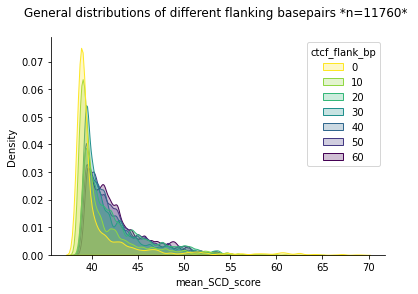

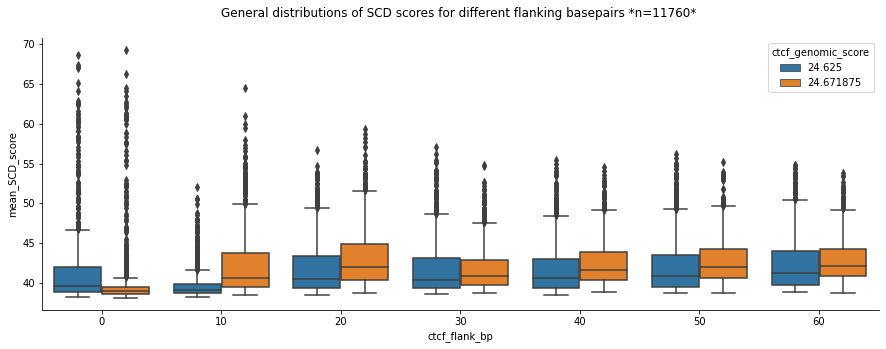

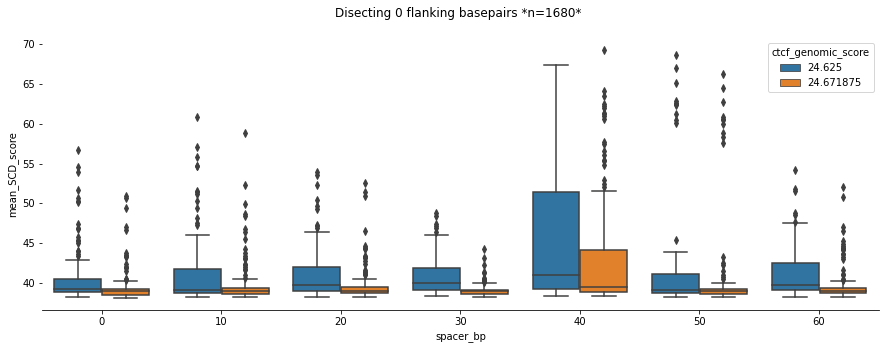

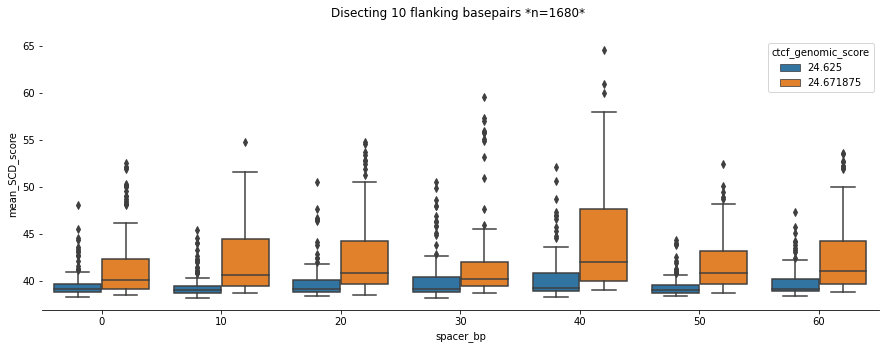

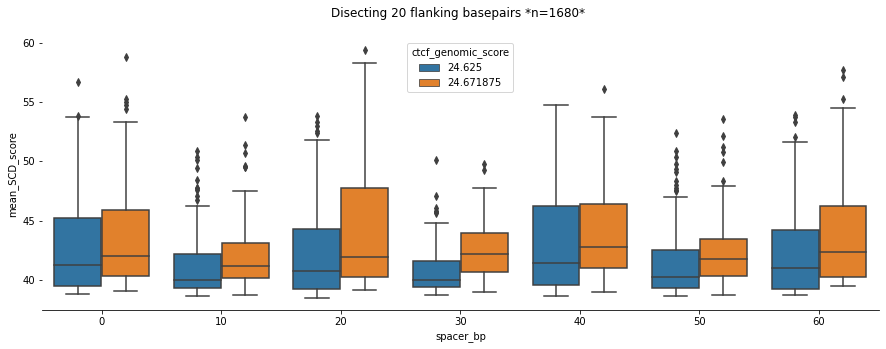

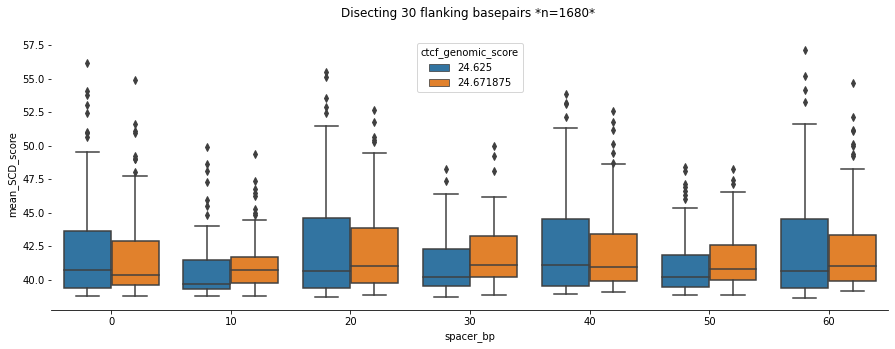

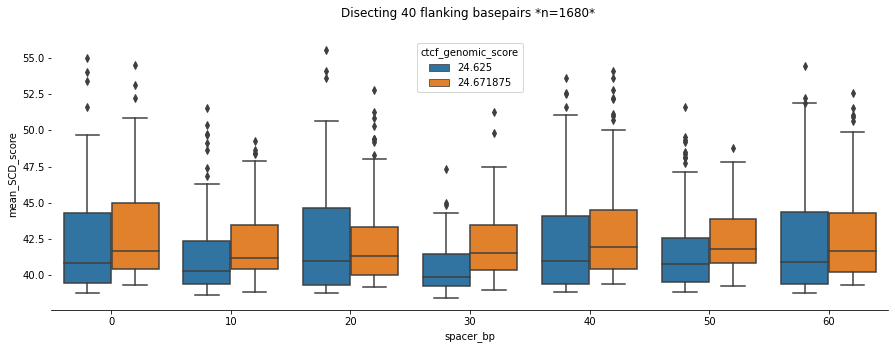

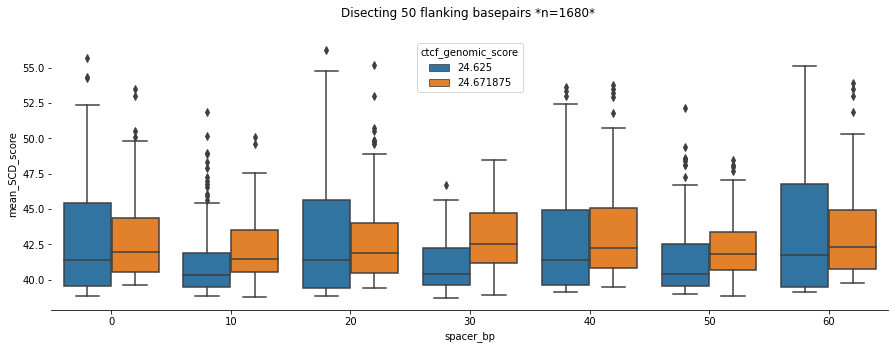

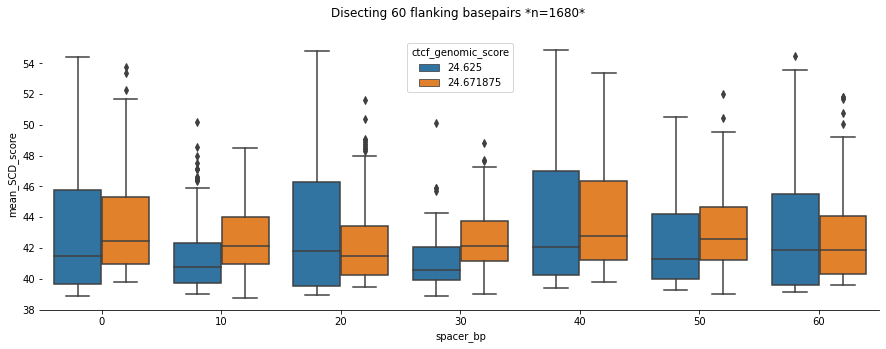

In [7]:
# flank_bp = 

sns.kdeplot(data=dfs, x="mean_SCD_score", hue="ctcf_flank_bp", bw_adjust=.3, fill=True, palette='viridis_r')
plt.title(f"General distributions of different flanking basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for stat in scd_stats:
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=dfs, x='ctcf_flank_bp', y=f"mean_{stat}_score", hue="ctcf_genomic_score")#palette='viridis_r', , hue="gene_id"
    # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
    plt.title(f"General distributions of {stat} scores for different flanking basepairs *n={dfs.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.show()

for score in [i for i in range(0,61,10)]:#[i for i in range(0,501,100)]:# 
    df_dummy_parameter = dfs.loc[dfs["ctcf_flank_bp"]==score]
    # with sns.set_style("whitegrid"):
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='spacer_bp', y="mean_SCD_score", hue="ctcf_genomic_score")
    # sns.stripplot(x="spacer_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} flanking basepairs *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True, left=True)
    # plt.ylim([35, 100])
    plt.show()
    plt.close()

# Effect of spacing basepairs

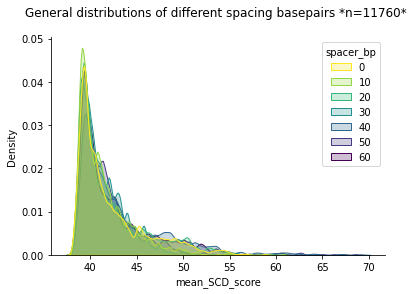

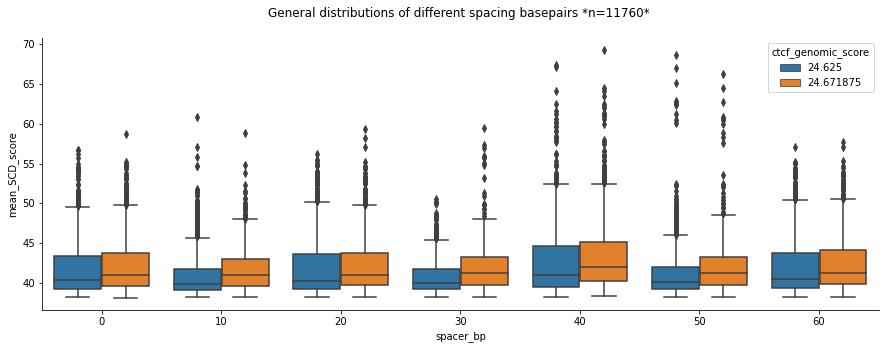

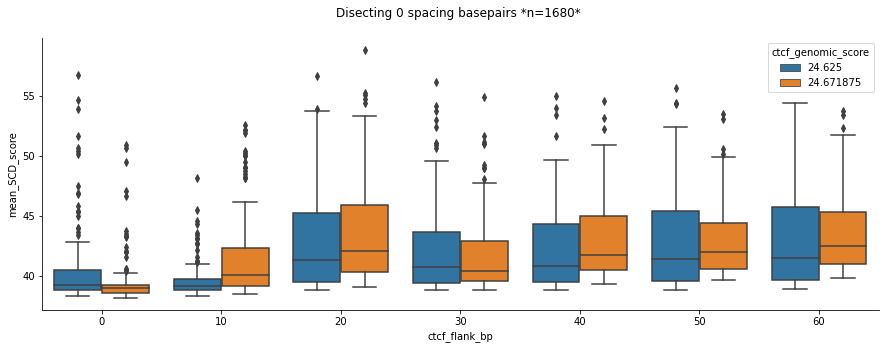

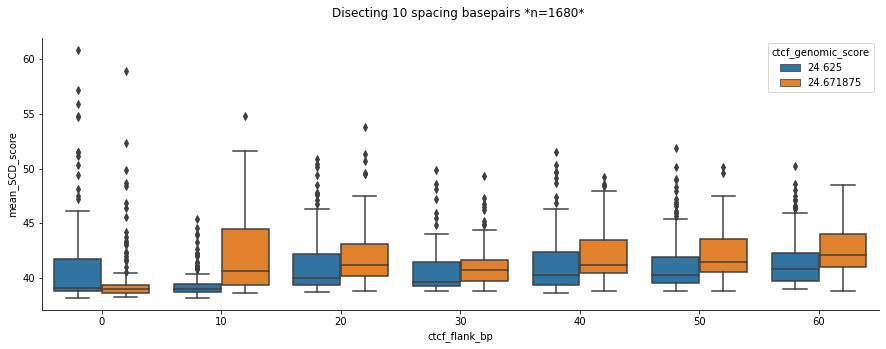

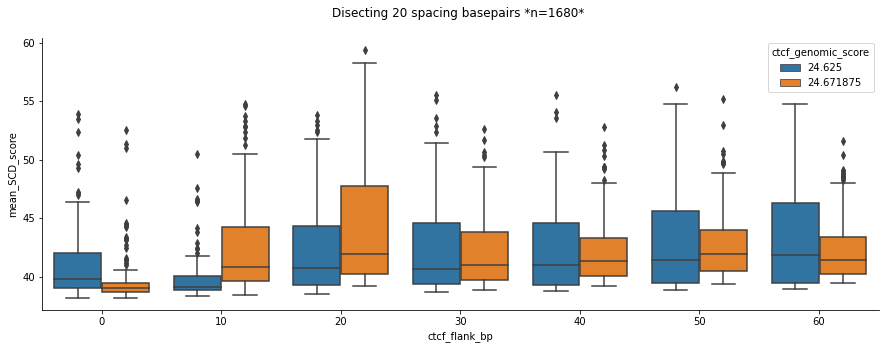

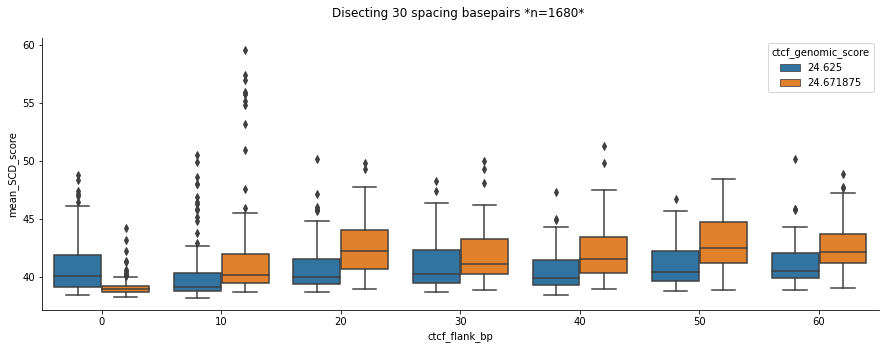

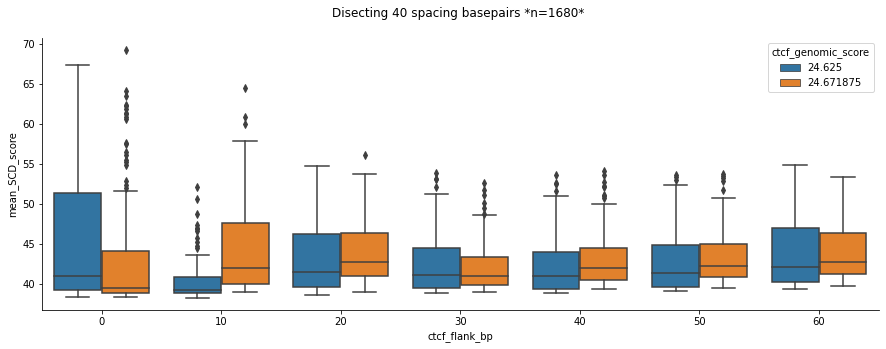

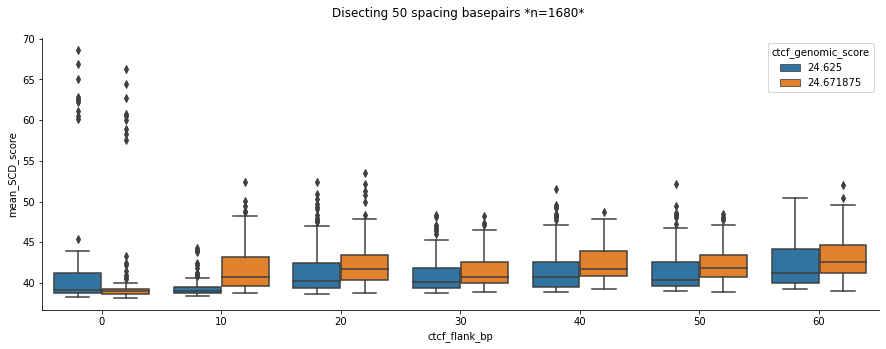

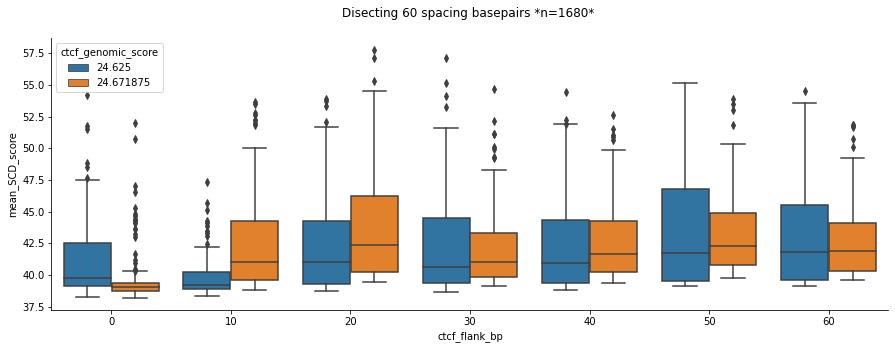

In [12]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="spacer_bp", bw_adjust=.3, fill=True, palette='viridis_r')
plt.title(f"General distributions of different spacing basepairs *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for stat in scd_stats:
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=dfs, x='spacer_bp', y=f"mean_{stat}_score", hue="ctcf_genomic_score")
    # sns.stripplot(x="spacer_bp", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
    plt.title(f"General distributions of different spacing basepairs *n={dfs.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.show()
    
for score in [i for i in range(0,61,10)]: 
    df_dummy_parameter = dfs.loc[dfs["spacer_bp"]==score]
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='ctcf_flank_bp', y="mean_SCD_score", hue="ctcf_genomic_score")
    # sns.stripplot(x="ctcf_flank_bp", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0, hue="ctcf_genomic_score")
    plt.title(f"Disecting {score} spacing basepairs *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    # plt.ylim([35, 100])
    plt.show()
    plt.close()

# Attempt to fish possible influencial genes

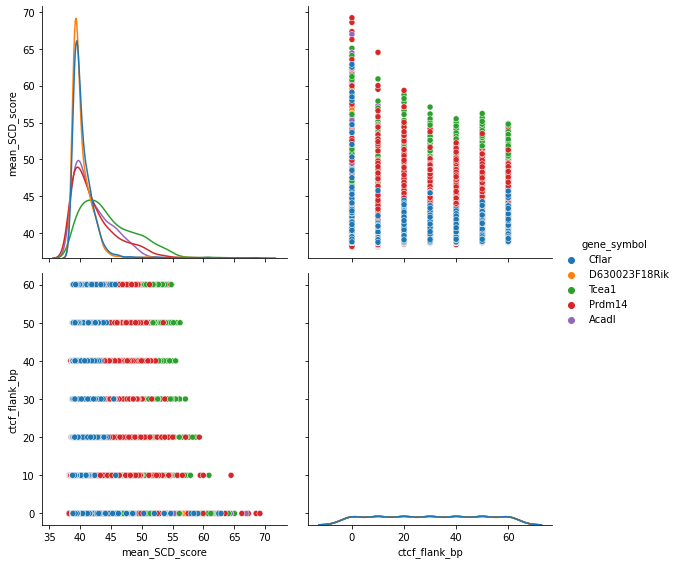

In [14]:
g = sns.PairGrid(dfs, vars=["mean_SCD_score", "ctcf_flank_bp"], hue="gene_symbol",height=4)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

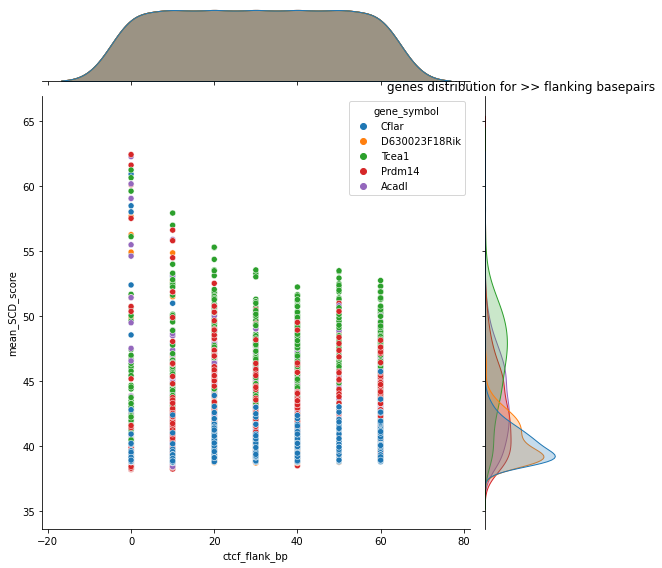

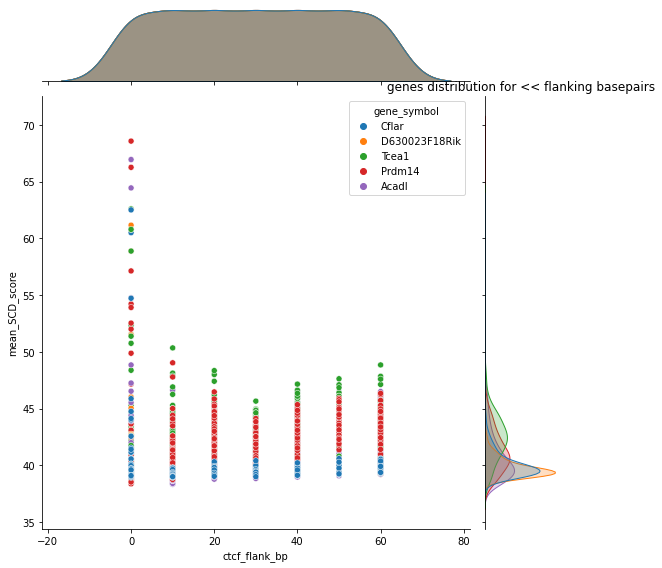

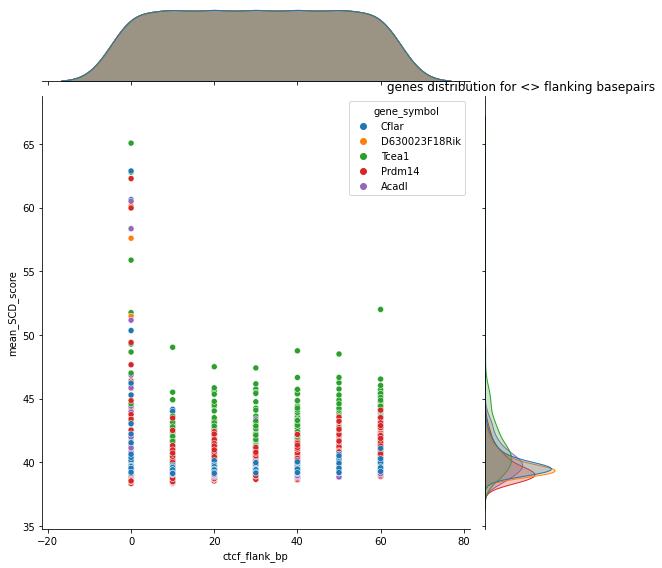

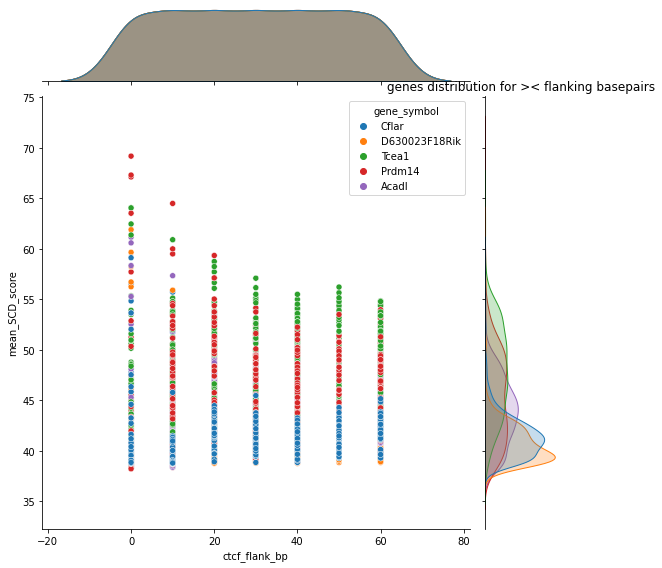

In [15]:
for score in [">>","<<","<>","><"]: #
    data_1 = dfs.loc[dfs["locus_orientation"]==score]
    cutt_off = 0
    sns.jointplot(data=data_1.loc[data_1["mean_SCD_score"]>cutt_off], y=f"mean_SCD_score", x = "ctcf_flank_bp", hue="gene_symbol",height=8)
    plt.title(f"genes distribution for {score} flanking basepairs")

# Follow up on the possible influencial genes

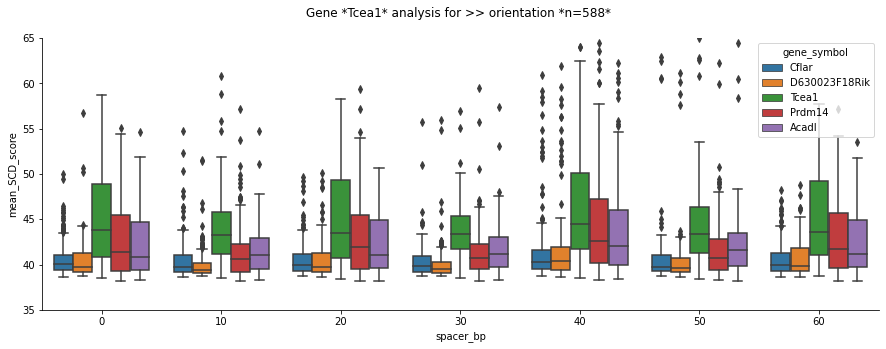

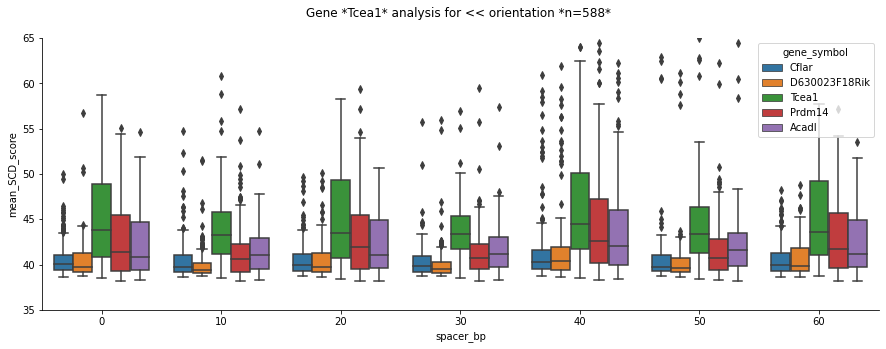

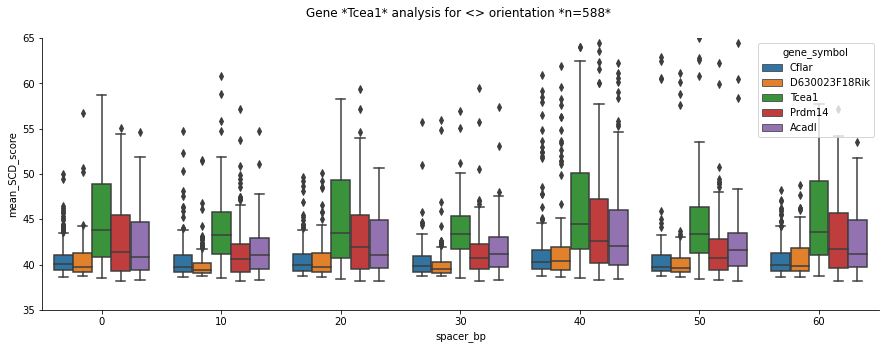

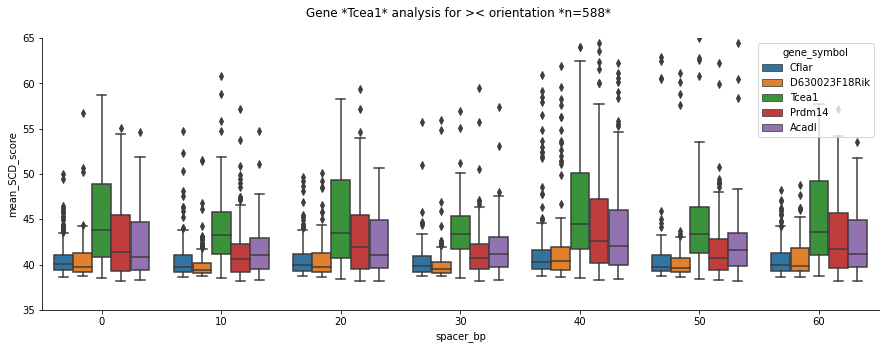

*****************************************
 
 
 
 



In [26]:
# for special_gene in ["Tcea1"]: #"ENSMUSG00000094571.1","ENSMUSG00000107222.1","ENSMUSG00000107185.1","ENSMUSG00000106945.1","ENSMUSG00000001376.17","ENSMUSG00000107233.1"]:
for score in [">>","<<","<>","><"]: 
    # data_1 = dfs.loc[dfs["locus_orientation"]==score]
    # data_2 = data_1.loc[data_1["gene_symbol"]==special_gene]
    # data_1 = dfs.loc[dfs["spacer_bp"]==20]
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=dfs, y=f"mean_SCD_score", x = "spacer_bp", hue="gene_symbol")
    plt.title(f"Gene *{special_gene}* analysis for {score} orientation *n={data_2.shape[0]}* \n")
    sns.despine(top = True, right = True)
    dt=[i for i in range(0,16,2)]
    # plt.plot(dt,[60]*(len(dt)),color='r')
    plt.ylim([35, 65])
    plt.show()
    plt.close()
print("*****************************************\n \n \n \n \n")

In [19]:
# df_3d = pd.DataFrame()
# df_3d['x'] = dfs['flank_bp']
# df_3d['y'] = dfs['spacer_bp']
# df_3d['z'] = dfs['locus_orientation']

# sns.pairplot(df_3d)

In [20]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter3D(dfs['flank_bp'].values.tolist(),dfs['spacer_bp'].values.tolist(),dfs['locus_orientation'].values.tolist())

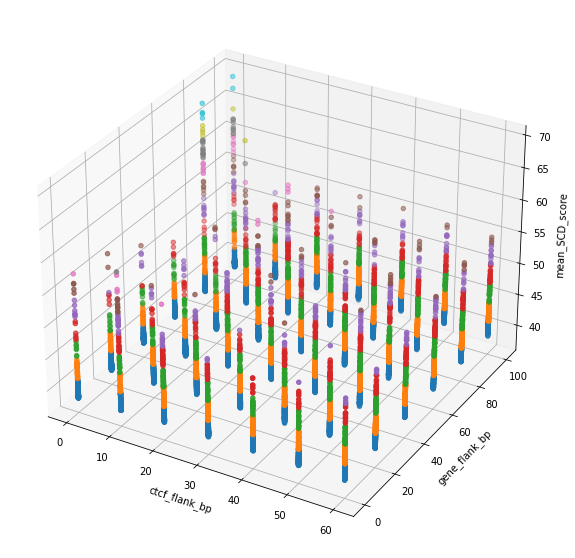

In [21]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
zdata = dfs["mean_SCD_score"]
xdata = dfs['ctcf_flank_bp']
ydata = dfs['gene_flank_bp']

ax.set_zlabel('mean_SCD_score')
ax.set_xlabel('ctcf_flank_bp')
ax.set_ylabel('gene_flank_bp')
# ax.set_zscale('log')

# get colormap from seaborn
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap =cmap)